# Obtain detuning from FID

In [84]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/")

In [85]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [86]:
FIDData = pd.read_csv(rel_path / "data/pi_pulse/50.csv", header = None)
chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
chan2 = np.subtract(chan2, np.mean(chan2[2000:]))

chan1_smooth = smooth(chan1, 35)
chan2_smooth = smooth(chan2, 35)

trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

In [87]:
peaks, _ = sc.signal.find_peaks(
    np.square(trans_mag),
   # height = .2,
    distance = 250,
    #prominence = .5,
    width = 400
)

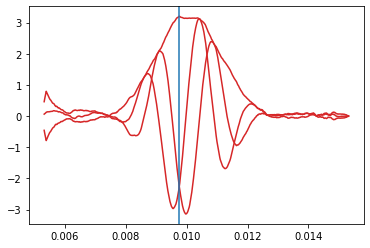

In [88]:
#plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan2_smooth, color = "tab:red")
plt.plot(tlist, trans_mag, color = "tab:red")
plt.axvline(tlist[np.argmax(trans_mag)])
#plt.plot(tlist, chan2_smooth, color = "tab:blue")

In [89]:
data_dir = rel_path / "data/pi_pulse/"

In [90]:
def get_max(time):
    FIDData = pd.read_csv(data_dir / f"{time}.csv", header = None)
    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
    chan2 = np.subtract(chan2, np.mean(chan2[2000:]))
    
    chan1_smooth = smooth(chan1, 35)
    chan2_smooth = smooth(chan2, 35)
    
    trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

    popt, pcov = curve_fit(gaussian, tlist, trans_mag, p0=[3.2, .001, .01])
    print(popt)

    return popt[0], np.sqrt(pcov[2][2])

def gaussian(x, A, sigma, mu):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

In [91]:
data = [(int(f.stem)*2,get_max(f.stem)[0], get_max(f.stem)[1]) for f in data_dir.iterdir()]
times, heights, errs = zip(*sorted(data))

[3.24098879e+00 1.03591231e-03 1.00634300e-02]
[3.24098879e+00 1.03591231e-03 1.00634300e-02]
[3.11779434e+00 1.04173155e-03 1.00505631e-02]
[3.11779434e+00 1.04173155e-03 1.00505631e-02]
[3.01020365e+00 1.02529595e-03 1.00769646e-02]
[3.01020365e+00 1.02529595e-03 1.00769646e-02]
[3.11450954e+00 1.02963097e-03 1.00667507e-02]
[3.11450954e+00 1.02963097e-03 1.00667507e-02]
[3.26559113e+00 1.03852672e-03 1.00651184e-02]
[3.26559113e+00 1.03852672e-03 1.00651184e-02]
[3.19817442e+00 1.03972965e-03 1.00501621e-02]
[3.19817442e+00 1.03972965e-03 1.00501621e-02]
[3.01247125e+00 1.04879114e-03 1.00386576e-02]
[3.01247125e+00 1.04879114e-03 1.00386576e-02]
[2.87365585e+00 1.02961198e-03 1.00871713e-02]
[2.87365585e+00 1.02961198e-03 1.00871713e-02]
[3.18744558e+00 1.03322382e-03 1.00642311e-02]
[3.18744558e+00 1.03322382e-03 1.00642311e-02]
[3.27665957e+00 1.03889109e-03 1.00559896e-02]
[3.27665957e+00 1.03889109e-03 1.00559896e-02]
[3.23893386e+00 1.04344121e-03 1.00535731e-02]
[3.23893386e+

In [92]:
def gaussian(t, A, sigma, mu):
    return A * np.exp(-(t-mu)**2/(2*sigma**2))

def quad(t, a,b,c):
    return a*(t-b)**2+c

from scipy.optimize import curve_fit
popt, pcov = curve_fit(quad, times, heights, sigma=errs,p0=[3.21, 1/100, 96])

(2.83, 3.37)

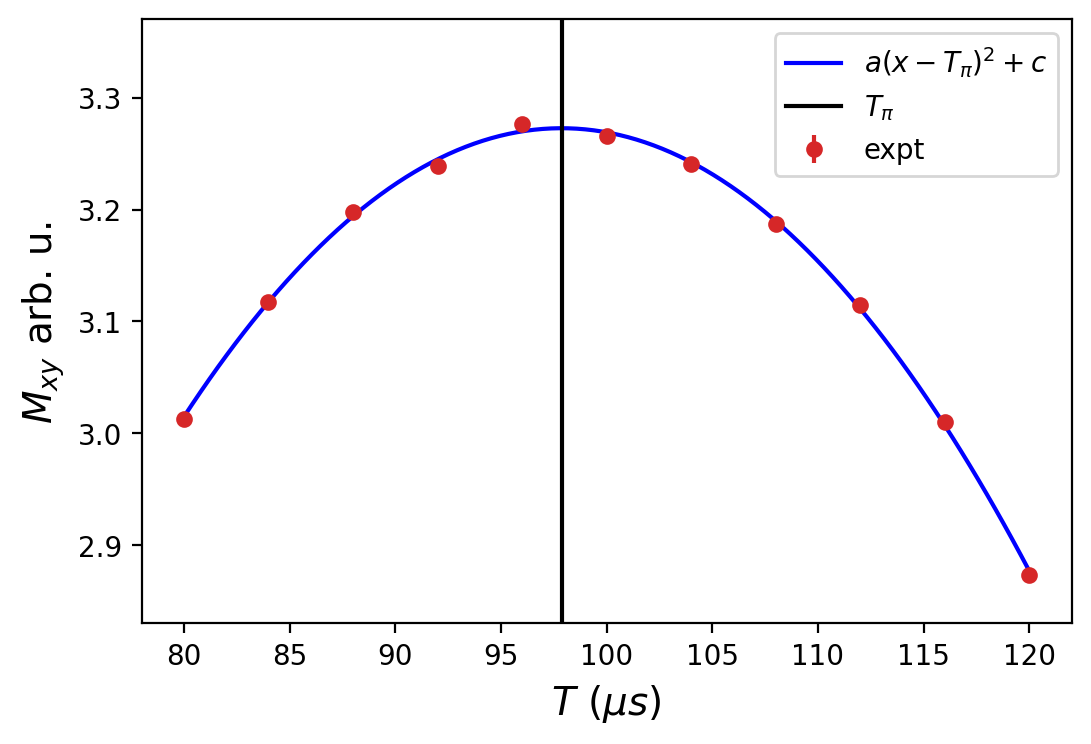

In [97]:
plt.errorbar(times, heights, yerr = errs,marker = ".",markersize=10, linestyle = "None", color = "tab:red", label = "expt")
xlist = np.linspace(min(times), max(times), 100)
plt.plot(xlist, [quad(x, *popt) for x in xlist], color = "b", label = r"$a(x-T_\pi)^2+c$")
plt.axvline(popt[1], color = "black", label = r"$T_{\pi}$")
plt.legend()
plt.xlabel(r"$T \ (\mu s)$", fontsize = 14)
plt.ylabel(r"$M_{xy}$ arb. u.", fontsize = 14)
plt.gcf().set_dpi(200)
plt.ylim([2.83, 3.37])

In [19]:
popt

array([3.26559113e+00, 1.03852672e-03, 1.00651184e-02])

In [73]:
popt[1]

0.0010296119767799065

In [74]:
np.pi/(popt[1]*1e-3)

3051239.4226561636

In [75]:
pcov

array([[ 1.39242874e-04, -3.32598251e-08,  5.03951281e-15],
       [-3.32598251e-08,  2.38335205e-11, -1.88063804e-18],
       [ 5.03951281e-15, -1.88063804e-18,  2.38335200e-11]])

In [76]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gaussian, tlist, trans_mag, p0=[3.2, .001, .01])

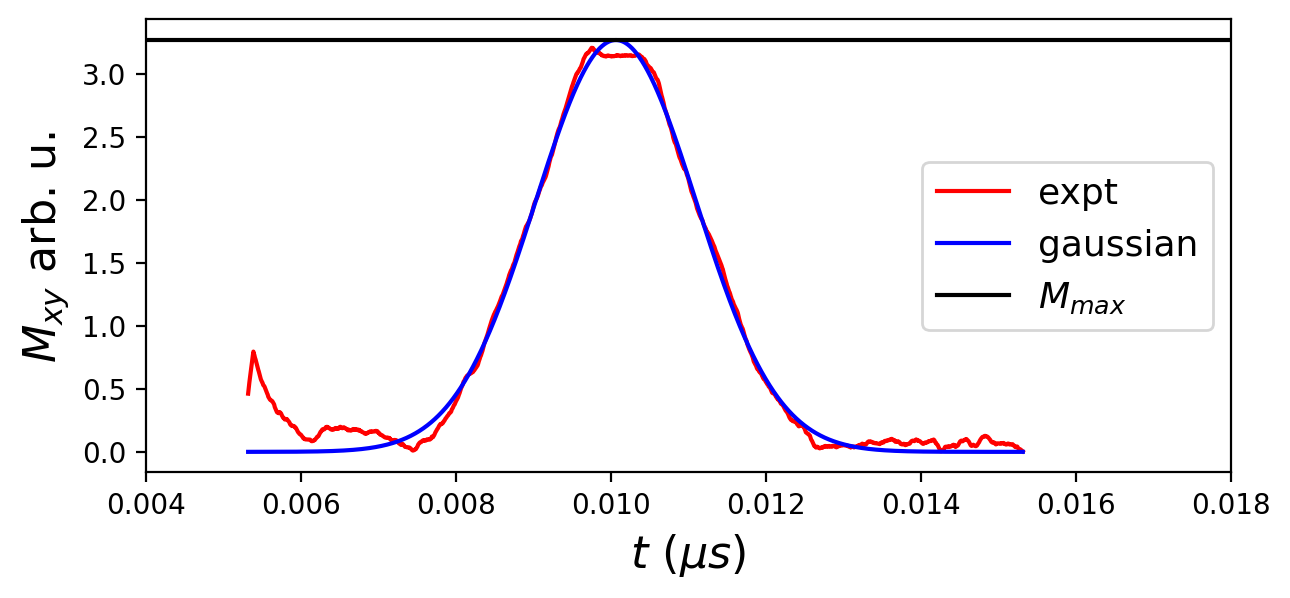

In [82]:
plt.plot(tlist, trans_mag, c="r", label = "expt")
plt.plot(tlist, [gaussian(t, *popt) for t in tlist], c="b", label = r"gaussian")
plt.axhline(popt[0], color="black", label=r"$M_{max}$")
plt.legend(fontsize = 13)
plt.ylabel(r"$M_{xy}$ arb. u.", fontsize = 16)
plt.xlabel(r"$t \ (\mu s)$", fontsize = 16)
plt.gcf().set_size_inches(7,3)
plt.xlim([.004, .018])
plt.gcf().set_dpi(200)

In [15]:
pcov

array([[ 6.12832851e-05, -1.29929465e-08,  2.00176431e-15],
       [-1.29929465e-08,  8.26407993e-12, -6.81625462e-19],
       [ 2.00176431e-15, -6.81625462e-19,  8.26407948e-12]])